# Loading and preparing data

In [2]:
import numpy as np

In [3]:
with open('../datasets/notmnist.pcl3', 'rb') as pickle_file:
    import pickle
    dataset = pickle.load(pickle_file)

In [4]:
def rearrange(dataset):
    xs = [[None for _ in range(10)] for _ in range(3)]
    ys = [[None for _ in range(10)] for _ in range(3)]

    for idx, letter_data in enumerate(dataset):
        np.random.shuffle(letter_data[0])

        sz = len(letter_data[1])
        from math import ceil
        bds = [ceil(sz * 0.8), ceil(sz * 0.9)]
        
        xs[0][idx], xs[1][idx], xs[2][idx] = np.split(letter_data[0], bds)
        ys[0][idx], ys[1][idx], ys[2][idx] = np.split(letter_data[1], bds)

    return [np.concatenate(tuple(lst)) for pair in zip(xs, ys) for lst in pair]

In [5]:
def shuffled(arys):
    from operator import itemgetter
    p = np.random.permutation(arys[0].shape[0])
    return map(itemgetter(p), arys)

rearranged = rearrange(dataset)
    
x_train, y_train = shuffled(rearranged[:2])
x_valid, y_valid = shuffled(rearranged[2:4])
x_test, y_test = shuffled(rearranged[4:])

train_len, valid_len, test_len = map(len, [y_train, y_valid, y_test])

In [7]:
def chart_acc(fit_history):
    from altair import Chart
    import pandas as pd
    
    history = pd.DataFrame(fit_history.history)
    history['epoch'] = range(len(history))

    tidy_history = pd.melt(history,
                           id_vars=['epoch'],
                           value_vars=['val_acc', 'acc'],
                           var_name='metric')
    
    return Chart(tidy_history).mark_line().encode(
        x='epoch:O',
        y='value:Q',
        color='metric'
    )

# Model A (one layer)

In [8]:
from keras.models import Sequential
from keras.layers.core import Dense, Flatten

In [8]:
model_a = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(10, activation='softmax', input_shape=(28, 28))])

model_a.compile(loss='categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

In [9]:
model_a.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
flatten_1 (Flatten)              (None, 784)           0           flatten_input_1[0][0]            
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 10)            7850        flatten_1[0][0]                  
Total params: 7850
____________________________________________________________________________________________________


In [10]:
fit_history_a = model_a.fit(x_train, y_train,
                    batch_size=128, nb_epoch=40, verbose=1,
                    validation_data=(x_valid, y_valid))

Train on 14984 samples, validate on 1870 samples
Epoch 1/40
14984/14984 [==============================] - 0s - loss: 13.9336 - acc: 0.1352 - val_loss: 13.5632 - val_acc: 0.1578
Epoch 2/40
14984/14984 [==============================] - 0s - loss: 13.3146 - acc: 0.1737 - val_loss: 13.0238 - val_acc: 0.1920
Epoch 3/40
14984/14984 [==============================] - 0s - loss: 13.1518 - acc: 0.1839 - val_loss: 13.0151 - val_acc: 0.1925
Epoch 4/40
14984/14984 [==============================] - 0s - loss: 13.0950 - acc: 0.1875 - val_loss: 12.9979 - val_acc: 0.1936
Epoch 5/40
14984/14984 [==============================] - 0s - loss: 13.1529 - acc: 0.1837 - val_loss: 13.0619 - val_acc: 0.1893
Epoch 6/40
14984/14984 [==============================] - 0s - loss: 13.1534 - acc: 0.1839 - val_loss: 12.9955 - val_acc: 0.1936
Epoch 7/40
14984/14984 [==============================] - 0s - loss: 13.0943 - acc: 0.1875 - val_loss: 13.0324 - val_acc: 0.1914
Epoch 8/40
14984/14984 [========================

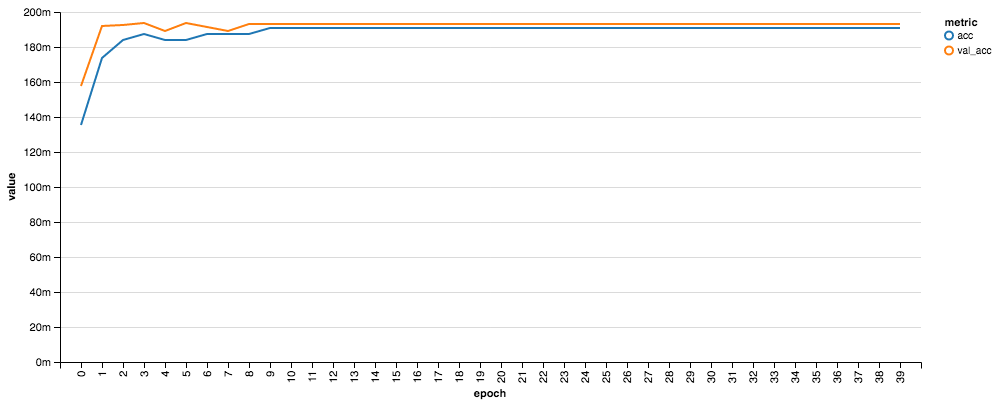

In [11]:
chart_acc(fit_history_a)

In [12]:
score = model_a.evaluate(x_test, y_test, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

1280/1870 [===================>..........] - ETA: 0sTest score: 13.0389580722
Test accuracy: 0.190909090933


---
# Model B (two layers)

In [13]:
model_b = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(1024, activation='tanh'),
        Dense(10, activation='softmax')])

model_b.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [14]:
model_b.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
flatten_2 (Flatten)              (None, 784)           0           flatten_input_2[0][0]            
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 1024)          803840      flatten_2[0][0]                  
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 10)            10250       dense_2[0][0]                    
Total params: 814090
____________________________________________________________________________________________________


In [15]:
fit_history_b = model_b.fit(x_train, y_train,
                    batch_size=128, nb_epoch=40, verbose=1,
                    validation_data=(x_valid, y_valid))

Train on 14984 samples, validate on 1870 samples
Epoch 1/40
14984/14984 [==============================] - 2s - loss: 0.8303 - acc: 0.7708 - val_loss: 0.6548 - val_acc: 0.7882
Epoch 2/40
14984/14984 [==============================] - 2s - loss: 0.5311 - acc: 0.8629 - val_loss: 0.5365 - val_acc: 0.8578
Epoch 3/40
14984/14984 [==============================] - 2s - loss: 0.4705 - acc: 0.8780 - val_loss: 0.5029 - val_acc: 0.8695
Epoch 4/40
14984/14984 [==============================] - 2s - loss: 0.4412 - acc: 0.8858 - val_loss: 0.4582 - val_acc: 0.8850
Epoch 5/40
14984/14984 [==============================] - 2s - loss: 0.4286 - acc: 0.8887 - val_loss: 0.4833 - val_acc: 0.8711
Epoch 6/40
14984/14984 [==============================] - 2s - loss: 0.4201 - acc: 0.8889 - val_loss: 0.4638 - val_acc: 0.8872
Epoch 7/40
14984/14984 [==============================] - 2s - loss: 0.3923 - acc: 0.8982 - val_loss: 0.4725 - val_acc: 0.8775
Epoch 8/40
14984/14984 [==============================] - 2s -

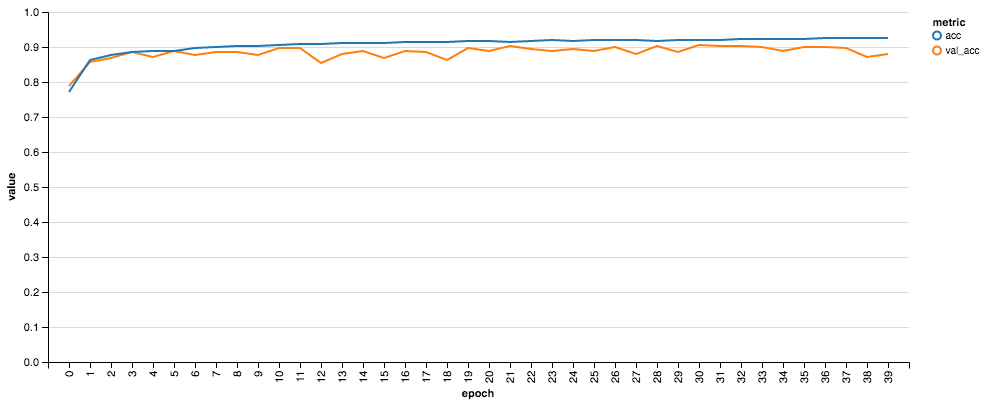

In [16]:
chart_acc(fit_history_b)

In [18]:
score = model_b.evaluate(x_test, y_test, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

1870/1870 [==============================] - 0s     
Test score: 0.446457915191
Test accuracy: 0.882887700662


---
# Model C (one convolutional layer)

In [19]:
from keras.layers.convolutional import Convolution2D

model_c = Sequential([
        Convolution2D(32, 5, 5, activation='relu', border_mode='valid', subsample=(2, 2), input_shape=(1, 28, 28)),
        Flatten(),
        Dense(1024, activation='tanh'),
        Dense(10, activation='softmax')])

model_c.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [20]:
model_c.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 32, 12, 12)    832         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
flatten_3 (Flatten)              (None, 4608)          0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
dense_4 (Dense)                  (None, 1024)          4719616     flatten_3[0][0]                  
____________________________________________________________________________________________________
dense_5 (Dense)                  (None, 10)            10250       dense_4[0][0]                    
Total params: 4730698
_____________________________________________________________________

In [21]:
fit_history_c = model_c.fit(x_train.reshape(train_len, 1, 28, 28), y_train,
                    batch_size=128, nb_epoch=40, verbose=1,
                    validation_data=(x_valid.reshape(valid_len, 1, 28, 28), y_valid))

Train on 14984 samples, validate on 1870 samples
Epoch 1/40
14984/14984 [==============================] - 21s - loss: 0.9062 - acc: 0.7467 - val_loss: 0.8817 - val_acc: 0.7214
Epoch 2/40
14984/14984 [==============================] - 22s - loss: 0.6291 - acc: 0.8380 - val_loss: 0.6144 - val_acc: 0.8471
Epoch 3/40
14984/14984 [==============================] - 23s - loss: 0.5364 - acc: 0.8639 - val_loss: 0.6161 - val_acc: 0.8112
Epoch 4/40
14984/14984 [==============================] - 23s - loss: 0.4851 - acc: 0.8757 - val_loss: 0.6468 - val_acc: 0.7947
Epoch 5/40
14984/14984 [==============================] - 23s - loss: 0.4408 - acc: 0.8832 - val_loss: 0.4321 - val_acc: 0.8850
Epoch 6/40
14984/14984 [==============================] - 23s - loss: 0.3852 - acc: 0.8945 - val_loss: 0.4365 - val_acc: 0.8765
Epoch 7/40
14984/14984 [==============================] - 22s - loss: 0.3607 - acc: 0.8994 - val_loss: 0.3750 - val_acc: 0.9005
Epoch 8/40
14984/14984 [==============================]

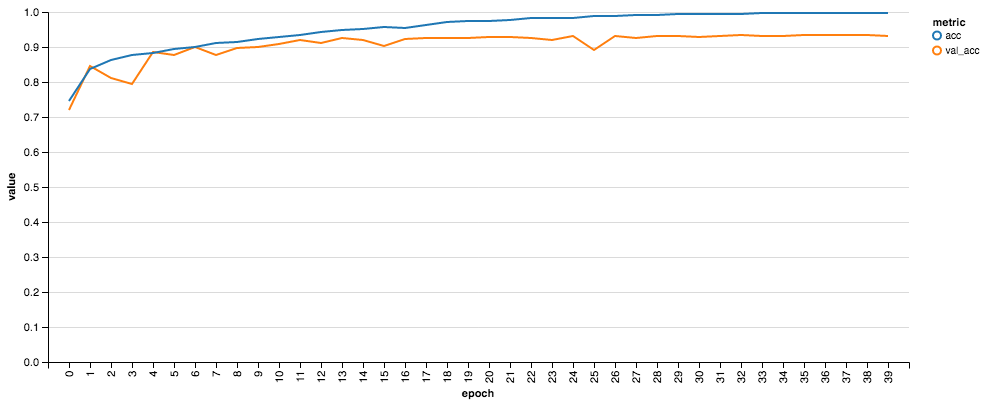

In [22]:
chart_acc(fit_history_c)

In [23]:
score = model_c.evaluate(x_test.reshape(test_len, 1, 28, 28), y_test, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

1870/1870 [==============================] - 1s     
Test score: 0.27088951239
Test accuracy: 0.922459892857


---
# Model D (one convolutional layer with maxpooling layer)

In [24]:
from keras.layers.pooling import MaxPooling2D

model_d = Sequential([
        Convolution2D(32, 5, 5, activation='relu', border_mode='valid', subsample=(2, 2), input_shape=(1, 28, 28)),
        MaxPooling2D(strides=(1, 1)),
        Flatten(),
        Dense(1024, activation='tanh'),
        Dense(10, activation='softmax')])

model_d.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [25]:
model_d.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_2 (Convolution2D)  (None, 32, 12, 12)    832         convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 32, 11, 11)    0           convolution2d_2[0][0]            
____________________________________________________________________________________________________
flatten_4 (Flatten)              (None, 3872)          0           maxpooling2d_1[0][0]             
____________________________________________________________________________________________________
dense_6 (Dense)                  (None, 1024)          3965952     flatten_4[0][0]                  
___________________________________________________________________________________________

In [26]:
fit_history_d = model_d.fit(x_train.reshape(train_len, 1, 28, 28), y_train,
                    batch_size=128, nb_epoch=40, verbose=1,
                    validation_data=(x_valid.reshape(valid_len, 1, 28, 28), y_valid))

Train on 14984 samples, validate on 1870 samples
Epoch 1/40
14984/14984 [==============================] - 23s - loss: 1.1739 - acc: 0.6568 - val_loss: 1.0667 - val_acc: 0.6540
Epoch 2/40
14984/14984 [==============================] - 23s - loss: 0.9345 - acc: 0.7479 - val_loss: 1.0437 - val_acc: 0.6385
Epoch 3/40
14984/14984 [==============================] - 23s - loss: 0.8133 - acc: 0.7894 - val_loss: 0.9874 - val_acc: 0.6690
Epoch 4/40
14984/14984 [==============================] - 23s - loss: 0.7048 - acc: 0.8292 - val_loss: 0.7243 - val_acc: 0.7818
Epoch 5/40
14984/14984 [==============================] - 23s - loss: 0.5724 - acc: 0.8565 - val_loss: 0.6948 - val_acc: 0.7636
Epoch 6/40
14984/14984 [==============================] - 23s - loss: 0.4762 - acc: 0.8709 - val_loss: 0.5391 - val_acc: 0.8524
Epoch 7/40
14984/14984 [==============================] - 23s - loss: 0.4284 - acc: 0.8836 - val_loss: 0.4745 - val_acc: 0.8556
Epoch 8/40
14984/14984 [==============================]

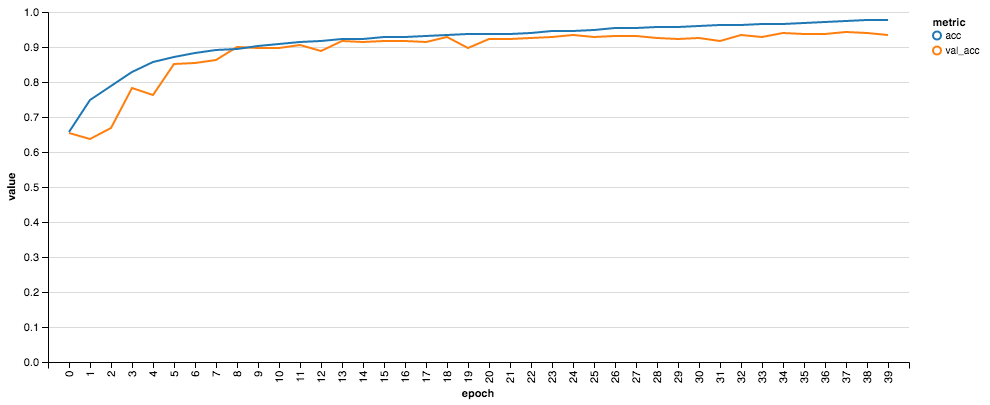

In [27]:
chart_acc(fit_history_d)

In [28]:
score = model_d.evaluate(x_test.reshape(test_len, 1, 28, 28), y_test, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

1870/1870 [==============================] - 1s     
Test score: 0.243066693667
Test accuracy: 0.929411764706


---
# Model E (one convolutional layer with maxpooling layer and dropout)

In [13]:
from keras.layers.core import Dropout

model_e = Sequential([
    Convolution2D(32, 5, 5, activation='relu', border_mode='valid', subsample=(2, 2), input_shape=(1, 28, 28)),
    MaxPooling2D(strides=(1, 1)),
    Flatten(),
    Dense(1024, activation='tanh'),
    Dropout(0.2),
    Dense(10, activation='softmax')])

model_e.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [14]:
model_e.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_2 (Convolution2D)  (None, 32, 12, 12)    832         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 32, 11, 11)    0           convolution2d_2[0][0]            
____________________________________________________________________________________________________
flatten_1 (Flatten)              (None, 3872)          0           maxpooling2d_1[0][0]             
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 1024)          3965952     flatten_1[0][0]                  
___________________________________________________________________________________________

In [15]:
fit_history_e = model_e.fit(x_train.reshape(train_len, 1, 28, 28), y_train,
                    batch_size=128, nb_epoch=40, verbose=1,
                    validation_data=(x_valid.reshape(valid_len, 1, 28, 28), y_valid))

Train on 14984 samples, validate on 1870 samples
Epoch 1/40
14984/14984 [==============================] - 22s - loss: 1.4707 - acc: 0.5176 - val_loss: 1.7191 - val_acc: 0.4005
Epoch 2/40
14984/14984 [==============================] - 23s - loss: 1.1544 - acc: 0.6235 - val_loss: 1.2257 - val_acc: 0.5914
Epoch 3/40
14984/14984 [==============================] - 23s - loss: 1.0811 - acc: 0.6579 - val_loss: 1.1113 - val_acc: 0.6412
Epoch 4/40
14984/14984 [==============================] - 23s - loss: 1.0275 - acc: 0.6786 - val_loss: 1.2482 - val_acc: 0.5241
Epoch 5/40
14984/14984 [==============================] - 23s - loss: 0.9598 - acc: 0.7078 - val_loss: 0.9677 - val_acc: 0.7096
Epoch 6/40
14984/14984 [==============================] - 23s - loss: 0.8847 - acc: 0.7400 - val_loss: 0.9473 - val_acc: 0.6979
Epoch 7/40
14984/14984 [==============================] - 23s - loss: 0.8293 - acc: 0.7568 - val_loss: 0.7024 - val_acc: 0.8203
Epoch 8/40
14984/14984 [==============================]

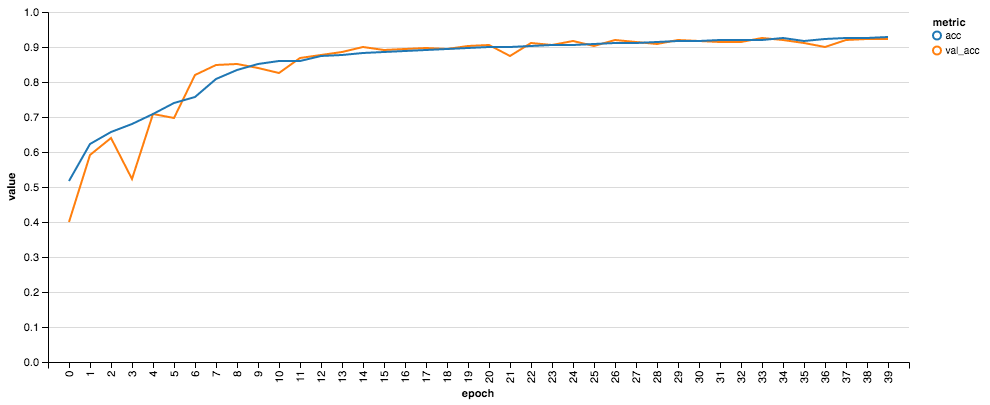

In [16]:
chart_acc(fit_history_e)

In [17]:
score = model_e.evaluate(x_test.reshape(test_len, 1, 28, 28), y_test, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

1870/1870 [==============================] - 0s     
Test score: 0.270375250961
Test accuracy: 0.922459893048


---
# Model F (two convolutional layers with maxpooling layers and dropout)

In [30]:
model_f = Sequential([
        Convolution2D(32, 5, 5, activation='relu', border_mode='valid', subsample=(2, 2), input_shape=(1, 28, 28)),
        MaxPooling2D(strides=(1, 1)),
        Convolution2D(2, 3, 3, activation='relu', border_mode='valid', subsample=(1, 1)),
        MaxPooling2D(strides=(1, 1)),
        Flatten(),
        Dense(1024, activation='tanh'),
        Dropout(0.5),
        Dense(10, activation='softmax')])

model_f.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [31]:
model_f.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_11 (Convolution2D) (None, 32, 12, 12)    832         convolution2d_input_6[0][0]      
____________________________________________________________________________________________________
maxpooling2d_10 (MaxPooling2D)   (None, 32, 11, 11)    0           convolution2d_11[0][0]           
____________________________________________________________________________________________________
convolution2d_12 (Convolution2D) (None, 2, 9, 9)       578         maxpooling2d_10[0][0]            
____________________________________________________________________________________________________
maxpooling2d_11 (MaxPooling2D)   (None, 2, 8, 8)       0           convolution2d_12[0][0]           
___________________________________________________________________________________________

In [32]:
fit_history_f = model_f.fit(x_train.reshape(train_len, 1, 28, 28), y_train,
                    batch_size=128, nb_epoch=40, verbose=1,
                    validation_data=(x_valid.reshape(valid_len, 1, 28, 28), y_valid))

Train on 14984 samples, validate on 1870 samples
Epoch 1/40
14984/14984 [==============================] - 20s - loss: 1.9106 - acc: 0.3948 - val_loss: 1.8660 - val_acc: 0.3535
Epoch 2/40
14984/14984 [==============================] - 21s - loss: 1.5066 - acc: 0.5124 - val_loss: 1.7229 - val_acc: 0.4476
Epoch 3/40
14984/14984 [==============================] - 21s - loss: 2.0394 - acc: 0.3389 - val_loss: 1.8099 - val_acc: 0.3904
Epoch 4/40
14984/14984 [==============================] - 21s - loss: 1.5273 - acc: 0.5019 - val_loss: 1.4327 - val_acc: 0.5283
Epoch 5/40
14984/14984 [==============================] - 20s - loss: 1.4022 - acc: 0.5511 - val_loss: 1.1170 - val_acc: 0.6198
Epoch 6/40
14984/14984 [==============================] - 21s - loss: 1.3763 - acc: 0.5562 - val_loss: 1.1193 - val_acc: 0.6535
Epoch 7/40
14984/14984 [==============================] - 20s - loss: 1.2447 - acc: 0.6127 - val_loss: 0.9681 - val_acc: 0.7257
Epoch 8/40
14984/14984 [==============================]

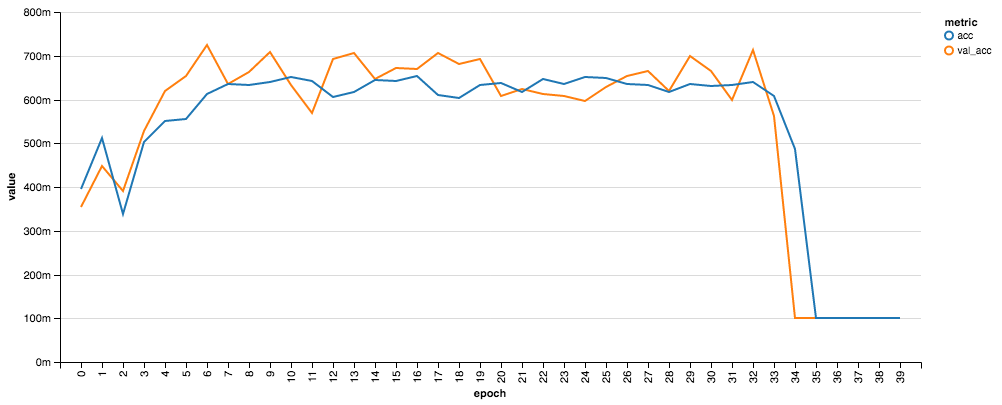

In [34]:
chart_acc(fit_history_f)

In [ ]:
score = model_f.evaluate(x_test.reshape(test_len, 1, 28, 28), y_test, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])